In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
df = pd.read_csv('201501-hubway-tripdata.csv')
df.shape


(7840, 15)

In [12]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             7840 non-null   int64  
 1   starttime                7840 non-null   object 
 2   stoptime                 7840 non-null   object 
 3   start station id         7840 non-null   int64  
 4   start station name       7840 non-null   object 
 5   start station latitude   7840 non-null   float64
 6   start station longitude  7840 non-null   float64
 7   end station id           7840 non-null   int64  
 8   end station name         7840 non-null   object 
 9   end station latitude     7840 non-null   float64
 10  end station longitude    7840 non-null   float64
 11  bikeid                   7840 non-null   int64  
 12  usertype                 7840 non-null   object 
 13  birth year               7840 non-null   object 
 14  gender                  

In [15]:
df.describe().round(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,7840.00,7840.00,7840.00,7840.00,7840.00,7840.00,7840.00,7840.00,7840.00
mean,647.88,91.93,42.37,-71.10,90.99,42.37,-71.10,932.27,1.21
std,3998.55,19.30,0.01,0.01,20.58,0.01,0.01,216.46,0.48
min,62.00,67.00,42.36,-71.14,1.00,42.33,-71.14,23.00,0.00
25%,287.00,75.00,42.36,-71.11,74.00,42.36,-71.11,748.00,1.00
50%,406.00,89.50,42.37,-71.10,89.00,42.37,-71.10,894.00,1.00
75%,602.00,107.00,42.37,-71.09,107.00,42.37,-71.09,1090.00,1.00
max,232319.00,145.00,42.40,-71.07,149.00,42.40,-71.05,1325.00,2.00


In [19]:
# Convert the start and end time columns from object to to timestamp:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,542,2015-01-01 00:21:44,2015-01-01 00:30:47,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,277,Subscriber,1984,1
1,438,2015-01-01 00:27:03,2015-01-01 00:34:21,80,MIT Stata Center at Vassar St / Main St,42.361962,-71.092053,95,Cambridge St - at Columbia St / Webster Ave,42.372969,-71.094445,648,Subscriber,1985,1
2,254,2015-01-01 00:31:31,2015-01-01 00:35:46,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,555,Subscriber,1974,1
3,432,2015-01-01 00:53:46,2015-01-01 01:00:58,115,Porter Square Station,42.387995,-71.119084,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,-71.111075,1307,Subscriber,1987,1
4,735,2015-01-01 01:07:06,2015-01-01 01:19:21,105,Lower Cambridgeport at Magazine St/Riverside Rd,42.356954,-71.113687,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,177,Customer,1986,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,823,2015-01-31 22:20:49,2015-01-31 22:34:33,88,Inman Square at Vellucci Plaza / Hampshire St,42.374035,-71.101427,87,Harvard University Housing - 115 Putnam Ave at...,42.366621,-71.114214,1118,Subscriber,1992,1
7836,721,2015-01-31 22:34:32,2015-01-31 22:46:33,73,Harvard Square at Brattle St / Eliot St,42.373231,-71.120886,87,Harvard University Housing - 115 Putnam Ave at...,42.366621,-71.114214,1005,Customer,1984,1
7837,567,2015-01-31 22:36:34,2015-01-31 22:46:01,145,Rindge Avenue - O'Neill Library,42.392766,-71.129042,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,854,Subscriber,1962,1
7838,197,2015-01-31 22:59:23,2015-01-31 23:02:41,70,Harvard Kennedy School at Bennett St / Eliot St,42.371196,-71.121473,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,718,Subscriber,1982,1


In [23]:
cols = ['start station name', 'end station name', 'bikeid', 'usertype', 'gender']
for col in cols:
    df[col] = df[col].astype('category')
    
cols

['start station name', 'end station name', 'bikeid', 'usertype', 'gender']

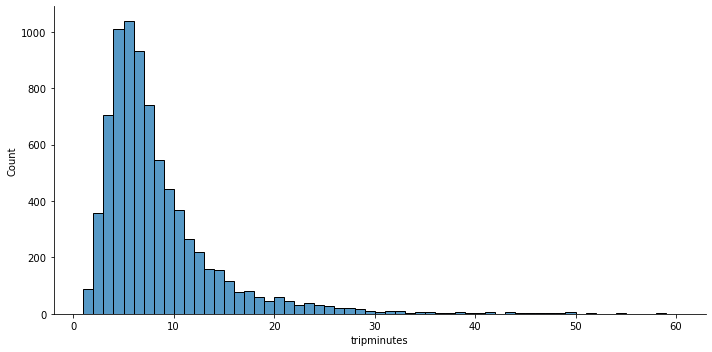

In [28]:
df['tripminutes'] = df['tripduration'] //60
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);

In [29]:
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')

<AxesSubplot:xlabel='start hour', ylabel='count'>

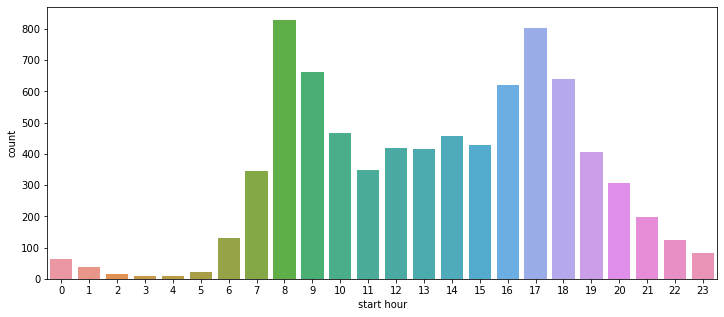

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x="start hour" )

<AxesSubplot:xlabel='start day', ylabel='count'>

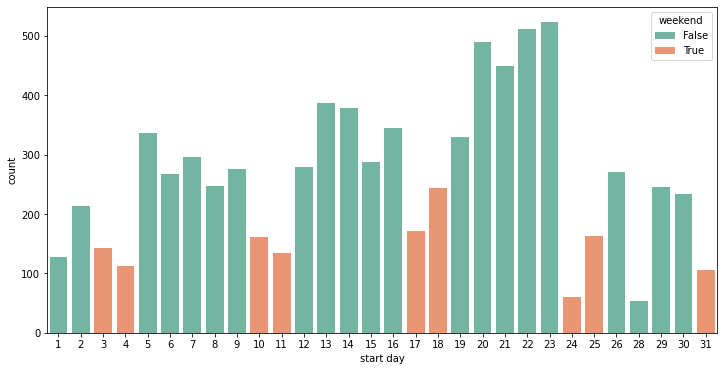

In [40]:
df['weekend'] = [d >= 5 for d in df['weekday'] ] # 0=monday
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=df,x="start day", hue='weekend', dodge=False)

In [45]:
def regression_parameters(x, y):
    sd_x = np.std(x)
    mean_x = np.mean(x)
    sd_y = np.std(y)
    mean_y = np.mean(y)
    slope = sd_y / sd_x
    intercept = mean_y - slope * mean_x
    return make_array(slope, intercept)



